In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

#datafile = '\\Users\\sarac\\OneDrive\\Documenti\\Magistrale_tn\\GeneEnv_Analysis\\dataset.csv'
datafile = '/home/bizzego/UniTn/data/GxE_Cataldo/dataset.csv'

In [ ]:
stim_dict = {'Instructions': -1,
             'interstimuli': 0,
             'cat' : 1,
             '3month': 2,
             '12month': 3,
             'woman' : 4}

In [2]:
TARGET = 'RRmean_normStimuli'

/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
data = pd.read_csv(datafile)
data.dropna(axis=0, inplace=True)

In [4]:
data.shape

(156, 151)

In [5]:
N_sub = len(data['subject'].unique())

In [6]:
#%% add vulnerability columns
data['vuln_76'] = 0
data.loc[(data['rs53576'] == 'GG')|
         (data['rs53576'] == 'AG'), 
         'vuln_76']  = 1



#data['vuln_98'] = 0 #!!! CORRECT?
#data.loc[(data['rs2254298'] == 'AA'), 'vuln_98'] = 1 #!!! CORRECT?

#### Is HRV normal? --> NO

                           W      pval  normal
RRmean_normStimuli  0.959066  0.000146   False


<AxesSubplot:title={'center':'RRmean_normStimuli'}, xlabel='label'>

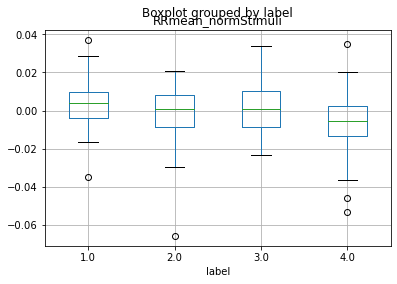

In [8]:
results_normality = pg.normality(data[TARGET])
print(results_normality)
data.boxplot(TARGET, by='label')

#### does HRV depend on the stimulus? --> YES

In [9]:
#kruskal because not normal
pg.kruskal(data, dv=TARGET, between='label')

Source  ddof1         H     p-unc
Kruskal  label      3  9.722848  0.021075

### Gene x Env (for each type of stimulus)

In [10]:
genes = ['vuln_76']
envs = ['PBI_M_care',
        'PBI_M_overp',
        'PBI_F_care',
        'PBI_F_overp']

#### CAT CRY (label = 1)

In [11]:
data_label = data.query('label == 1')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                   0.03199
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.992
Time:                        10:46:49   Log-Likelihood:                 112.95
No. Observations:                  39   AIC:                            -217.9
Df Residuals:                      35   BIC:                            -211.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 3MO CRY (label = 2)

In [12]:
data_label = data.query('label == 2')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.4690
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.706
Time:                        10:47:43   Log-Likelihood:                 108.62
No. Observations:                  39   AIC:                            -209.2
Df Residuals:                      35   BIC:                            -202.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 12MO LAUGH (label = 3)

In [13]:
data_label = data.query('label == 3')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.1458
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.932
Time:                        10:47:55   Log-Likelihood:                 113.72
No. Observations:                  39   AIC:                            -219.4
Df Residuals:                      35   BIC:                            -212.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### WOMAN CRY (label = 4)

In [14]:
data_label = data.query('label == 4')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_76 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.7674
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.520
Time:                        10:48:04   Log-Likelihood:                 105.58
No. Observations:                  39   AIC:                            -203.2
Df Residuals:                      35   BIC:                            -196.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### SHOW data for significant results

In [ ]:
#%% Significant results>>>
label = 1
data_label = data.query('label == @label')

gene_col = 'vuln_76'
env_col = 'PBI_M_overp'

data_nonvuln = data_label.query(f'{gene_col} == 0 ')
data_vuln = data_label.query(f'{gene_col} == 1 ')

formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
model = smf.ols(formula=formula, data=data_label).fit()
print('\n')
print(f'{gene_col} x {env_col}')
print(model.summary())

f, axes = plt.subplots(1,2, sharex=True, sharey=True)

f.suptitle(f'{gene_col} x {env_col}')

plt.sca(axes[0])
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or', alpha=0.15)
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

plt.sca(axes[1])
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob', alpha=0.15)
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)